## 統計学基礎の基礎：サンプリング

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
import numpy.random as rd
import pandas as pd
import html5lib, time, sys
from datetime import datetime as dt
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
import cPickle as pickle
import scipy.stats as st


### 正規分布の成り立ち

In [34]:
# コイン投げ, 20回投げて表が1, 裏が0
coin_toss = st.bernoulli.rvs(p=0.5, size=20)
coin_toss

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

### 20回コインを投げて表が出た回数を数える。これを100セット実施

In [23]:
set_20 = []
for i in range(100):
    coin_toss = st.bernoulli.rvs(p=0.5, size=20)
    print np.sum(coin_toss),

9 12 11 4 10 12 10 9 9 9 8 9 10 11 11 8 12 11 15 7 16 8 11 10 13 10 11 12 7 11 11 11 8 9 10 13 12 10 12 8 11 8 12 8 10 12 11 11 13 13 7 11 8 13 12 7 5 9 12 9 8 11 11 10 10 10 10 5 16 6 14 9 10 13 11 7 11 10 8 11 13 8 9 13 7 12 9 11 10 10 7 12 8 12 11 6 14 9 13 13


### 10000セット実施

In [27]:
set_20 = []
for i in range(10000):
    coin_toss = st.bernoulli.rvs(p=0.5, size=20)
    n = np.sum(coin_toss)
    set_20.append(n)

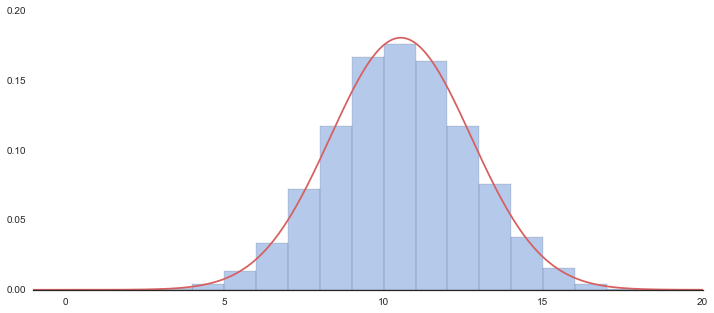

In [32]:
# Set up the matplotlib figure
data = np.array(set_20)

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

m = data.mean()
s = data.std()
# Plot a kernel density estimate and rug plot
sns.distplot(data, hist=True, kde=True, bins=15, rug=False, color="b", kde_kws={"lw":0})

xx = np.linspace(-5, 20, 501)
yy = st.norm.pdf(xx, loc=m, scale=s)
plt.plot(xx+.5,yy,"r")
plt.xlim(-1,20)
plt.ylim(0,0.20)
plt.show()

### 100万件のサンプルデータを生成

In [2]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(2139)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=1000000)

### ヒストグラムの描画

average:30.0039319799


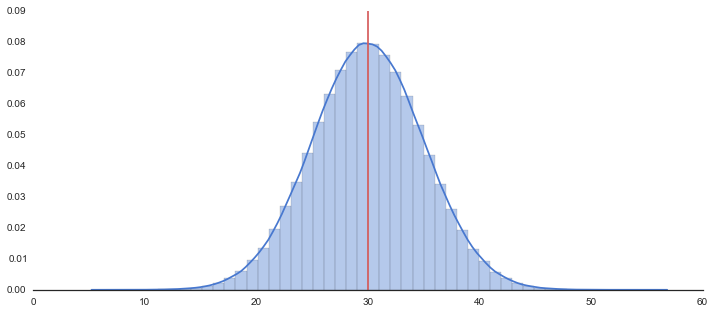

In [3]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=True, rug=False, color="b")

# Calculate average
m = np.mean(d)
print "average:{}".format(m)
plt.plot([m,m],[0,0.09], 'r')

plt.show()

### 割合を数えてみる

In [4]:
d = np.array(d)

all = len(d)              # 全データ数
small = len(d[d < 20])    # 20より小さいものの個数
large = len(d[d > 40])    # 40より大きいものの個数
mid = all - small - large # その中間にある個数

print "all:\t{0:7d}".format(all)
print "small:\t{0:7d}({1:.2f}%)".format(small, small/float(all)*100)
print "mid:\t{0:7d}({1:.2f}%)".format(mid, mid/float(all)*100)
print "large:\t{0:7d}({1:.2f}%)".format(large, large/float(all)*100)


all:	1000000
small:	  22747(2.27%)
mid:	 954375(95.44%)
large:	  22878(2.29%)


### 100万件から100個サンプリングする

In [5]:
df = pd.DataFrame(d, columns=['data'])
sample = df.sample(n=100)
sample

,data
661791,31.676349
117635,22.581528
354823,28.340945
745011,23.605994
581106,38.992693
384510,23.978059
351111,27.463127
381588,28.587770
84686,42.291225
218477,21.943261


### 100個のヒストグラム

average:data    29.65548
dtype: float64


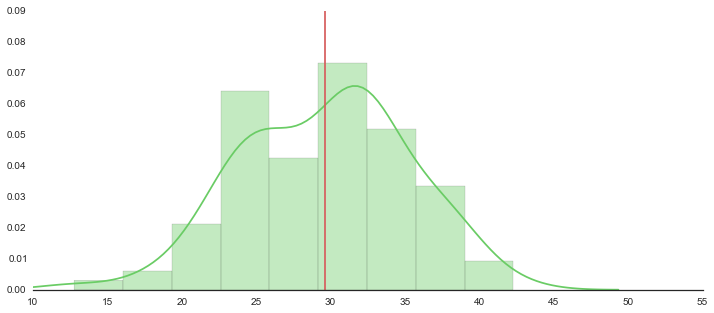

In [6]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(sample, hist=True, kde=True, rug=False, color="g")

# Calculate average
m = np.mean(sample)
print "average:{}".format(m)
plt.plot([m,m],[0,0.09], 'r')
plt.xlim(10,55)
plt.show()

### たくさん書いて眺めてみる

(0,0) (0,1) (0,2) (0,3) (1,0) (1,1) (1,2) (1,3) (2,0) (2,1) (2,2) (2,3) (3,0) (3,1) (3,2) (3,3)


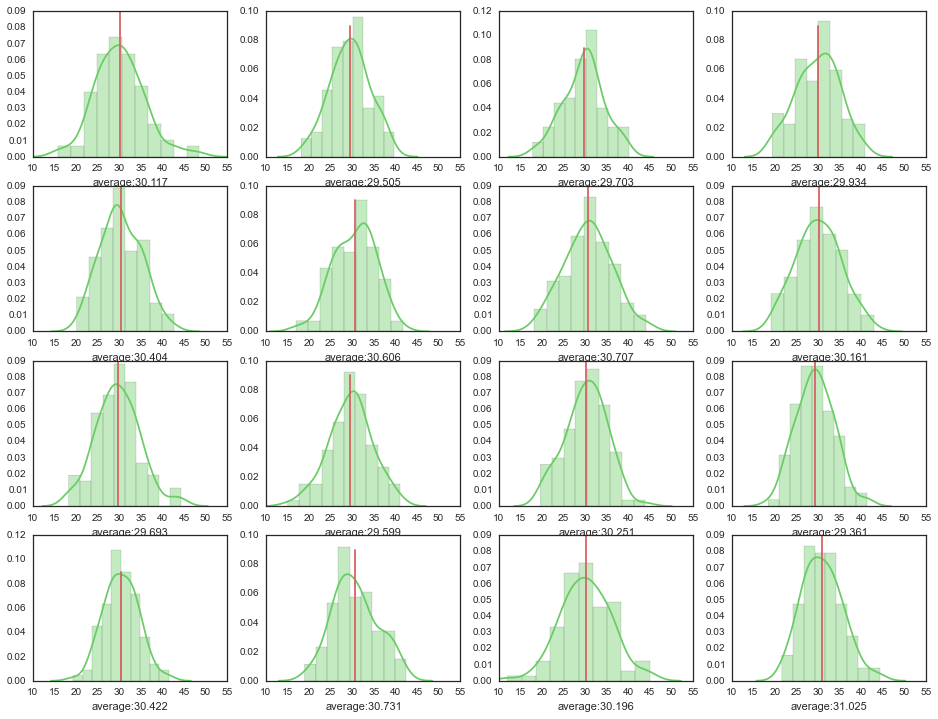

In [7]:
ncol = 4
nrow = 4

f, axes = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*3))

for i in range(nrow):
    for j in range(ncol):
        print "({},{})".format(i, j), 
        sample = df.sample(n=100)
        m = np.mean(sample)
        sns.distplot(sample, hist=True, kde=True, rug=False, color="g", ax=axes[i, j], 
                     axlabel="average:{0:.3f}".format(float(m)))
        axes[i, j].plot([m,m],[0,0.09], 'r')
        axes[i, j].set_xlim(10,55)


### さらにたくさん(1000回)サンプリングして、その平均値を集めてみる

In [8]:
%time ave_list = [np.mean(df.sample(n=100)) for _ in range(1000)]

CPU times: user 7min 22s, sys: 22.8 s, total: 7min 45s
Wall time: 9min 19s


### 1000個の平均値でヒストグラムを描いてみる

average:30.0225599721


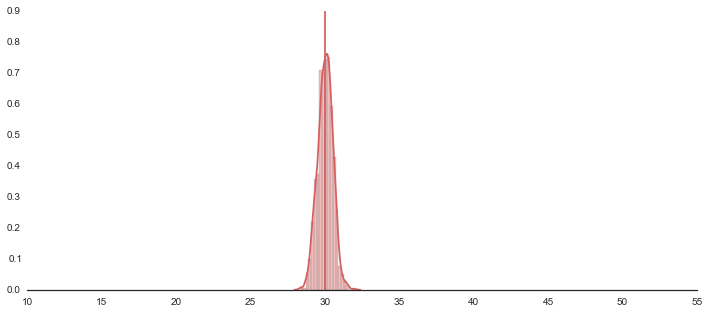

In [9]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
print "average:{}".format(m)
plt.plot([m,m],[0,0.9], 'r')
plt.xlim(10,55)
plt.show()

### 拡大

average:30.0225599721
sd:0.507913467366


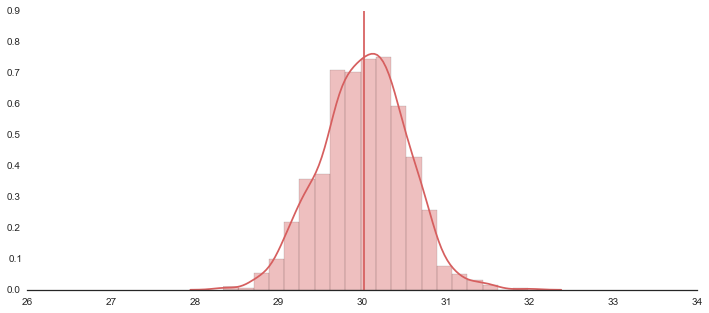

In [11]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
sd = np.sqrt(np.var(ave_list))
print "average:{}".format(m)
print "sd:{}".format(sd)
plt.plot([m,m],[0,0.9], 'r')
plt.xlim(26,34)
plt.show()